<a href="https://colab.research.google.com/github/manojkhara/DataScienceMasters/blob/main/week-3/pytorch/3%20CNN%20using%20Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/arjuntejaswi/plant-village

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = "/content/drive/MyDrive/DL Workshops/DL Workshop | 2025 T1/Colabs/potato-leaf-jpg-image-20250418T130055Z-001.zip"
import zipfile
import os

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("potato_data")

In [ ]:
import torch
from torch import nn,optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset, random_split

In [ ]:
dir = "/content/potato_data/potato-leaf-jpg-image"
full_dataset = datasets.ImageFolder(dir, transform = None)

In [ ]:
len(full_dataset)

2152

In [ ]:
full_dataset.classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# image, label =
image, label = full_dataset[0]

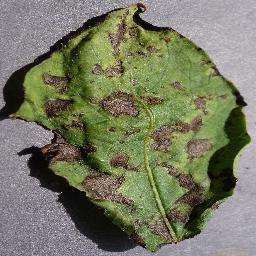

In [ ]:
image

In [ ]:
label

0

In [ ]:
dir = "/content/potato_data/potato-leaf-jpg-image"
full_dataset = datasets.ImageFolder(dir, transform = transforms.ToTensor())

In [ ]:
image, label = full_dataset[0]

In [ ]:
image.shape # depth , width and height RGB

torch.Size([3, 256, 256])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_size = int(len(full_dataset)*0.8)
test_size = len(full_dataset) - int(len(full_dataset)*0.8)

431

In [ ]:
train_set, test_set = random_split(full_dataset,[train_size, test_size ])

In [ ]:
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

In [ ]:
nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1, stride=1) 256 - 3 + 2 + 1 = 256
nn.ReLU(),
nn.MaxPool2d(kernel_size=2,padding = 0, stride=2), (256-2)/2 + 1 = 128
nn.Conv2d(32, out_channels=64, kernel_size=3, padding=1, stride = 1) # 128
nn.ReLU(),
nn.MaxPool2d(kernel_size=2,stride=2), (128-2)/2 + 1 = 64

In [ ]:
254/2

127.0

In [ ]:

class myCNN(nn.Module):
  def __init__(self, in_channels):
    super().__init__()


    self.features = nn.Sequential(
        nn.Conv2d(in_channels, out_channels=32, kernel_size=3, padding=1, stride=1), # 256
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,padding = 0, stride=2),  #(256-2)/2 + 1 = 128
        nn.Conv2d(32, out_channels=64, kernel_size=3, padding=1, stride=1), # 128
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2), #(128-2)/2 + 1 = 64
    )


    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=64*64*64, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=32),
        nn.ReLU(),
        nn.Linear(in_features=32, out_features=3),
    )

  def forward(self, x):
    x = self.features(x)
    x = self.classifier(x)
    return x

In [ ]:
myCNN()

In [ ]:
from torchsummary import summary
summary(myCNN(3), (3, 256, 256))

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
#@title mini-batch SGD


torch.manual_seed(42)

# define the model
model = myCNN(3)
model.to(device)

optimizer = optim.SGD(model.parameters(), lr = 0.01)

EPOCHS = 30

model.train()

for epoch in range(EPOCHS):

  loss_per_epoch = 0

  for features, labels in train_loader:
    features = features.to(device)
    labels = labels.to(device)


    # forward pass
    y_pred = model.forward(features)

    # loss computation
    loss_func = nn.CrossEntropyLoss()
    loss = loss_func(y_pred, labels)


    #make gradients zero
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    #weight updates
    optimizer.step()

    loss_per_epoch += loss

  print("loss per epoch =", loss_per_epoch)




loss per epoch = tensor(50.2412, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(48.3563, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(47.0469, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(43.2188, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(38.6456, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(30.8681, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(27.7246, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(24.7008, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(22.7491, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(19.2236, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(18.2339, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(15.0300, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(13.8764, device='cuda:0', grad_fn=<AddBackward0>)
loss per epoch = tensor(13.5498, devic

In [ ]:
64*64*64

262144

In [ ]:
64*64*61

249856

In [ ]:
model.eval() # batchnorm, dropout ----> freeze

myCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=262144, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [ ]:

with torch.no_grad():
  total_loss = 0
  for features, labels in test_loader:
    features = features.to(device)
    labels = labels.to(device)


    # forward pass
    y_pred = model.forward(features)

    # loss computation
    loss_func = nn.CrossEntropyLoss()
    loss = loss_func(y_pred, labels)

    total_loss += loss

  print(loss)


tensor(0.0296, device='cuda:0')


In [ ]:
y_pred.max(axis=1)

torch.return_types.max(
values=tensor([ 4.1801,  7.2777,  2.9228,  6.6978,  6.2466,  6.4976, 10.6728, 13.8182,
         4.3439,  6.2930, 16.3630,  7.0854,  2.2427,  7.9813, 10.0596],
       device='cuda:0'),
indices=tensor([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0], device='cuda:0'))

In [ ]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.974477958236659


In [ ]:
outputs

tensor([[ -2.9959,   4.1801,  -2.4294],
        [  7.2777,   1.8925,  -7.3953],
        [ -3.6748,   2.9228,  -0.5214],
        [ -2.4880,   6.6978,  -5.6649],
        [  6.2466,   2.2855,  -7.0979],
        [  3.2276,   6.4976,  -9.9211],
        [ 10.6728,   3.8097, -12.0863],
        [ 13.8182,   3.0021, -13.6187],
        [ -2.4990,   4.3439,  -2.9725],
        [  6.2930,   1.8244,  -6.5667],
        [ 16.3630,   4.1882, -16.8436],
        [ -4.5475,   7.0854,  -4.6040],
        [  1.2956,   2.2427,  -3.3800],
        [ -3.3519,   7.9813,  -6.5117],
        [ 10.0596,   4.4465, -12.3882]], device='cuda:0')

In [ ]:
predicted

tensor([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0], device='cuda:0')

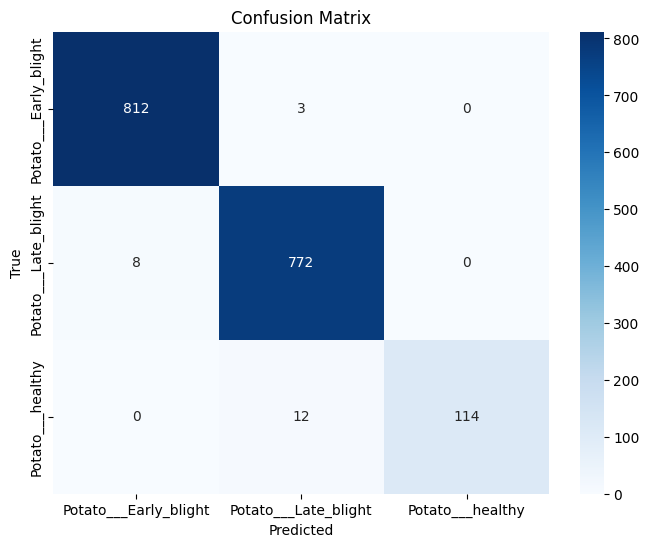

In [ ]:
# prompt: plot the confusion matrix for this
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'test_loader', 'model', and 'device' are defined as in your previous code

y_true = []
y_pred = []

with torch.no_grad():
    for batch_features, batch_labels in train_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(batch_labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
